In [3]:
import numpy as np
import seaborn as sns
from skimage import data
from matplotlib import pyplot as plt

#

## Simulation Population de Poisson

In [73]:
def pop_poisson(anneé : int) :

    pop : int = 10000
    mat_nb_poisson = np.array([[10000],[0],[0],[0],[0],[0],[0],[0],[0]])
    mat_coef_poisson = np.array([[0,0,0,2.5,2.5,0,0,0,0],[0.65,0,0,0,0,0,0,0,0],[0,0.7,0,0,0,0,0,0,0],[0,0,0.6,0,0,0,0,0,0],[0,0,0,0.65,0,0,0,0,0],[0,0,0,0,0.65,0,0,0,0],[0,0,0,0,0,0.45,0,0,0],[0,0,0,0,0,0,0.3,0,0],[0,0,0,0,0,0,0,0.20,0]])
    res = np.zeros((9,1))
    tab = []

    for i in range(anneé) :
        res =  np.matmul(mat_coef_poisson,mat_nb_poisson).astype(int)
        mat_nb_poisson = res
        tab.append(res)
    
    sns.set_theme(style='darkgrid')
    sns.lineplot(data=res)

None


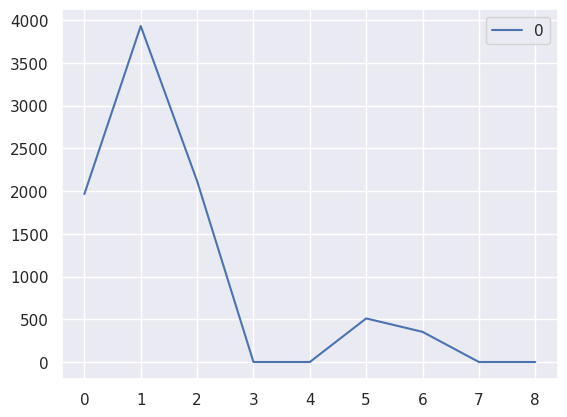

In [74]:
print(pop_poisson(10))

## Filtrage d'image

In [47]:
def filtrage_image_vertical(camera) :

    mat_image = np.array(camera)
    mat_coef_vertical = np.zeros(mat_image.shape)

    j : int = 1
    
    for i in range(1,len(mat_coef_vertical)-1) :
        mat_coef_vertical[i][j-1] = 0.33
        mat_coef_vertical[i][j] = 0.33
        mat_coef_vertical[i][j+1] = 0.33
        j += 1
    
    #probelme dans les coin a traiter en dehors de la boucle plus premiere ligne

    mat_coef_vertical[0][0] = 1
    mat_coef_vertical[len(mat_coef_vertical)-1][j-1] = 0.33
    mat_coef_vertical[len(mat_coef_vertical)-1][j] = 0.33

    mat_image_floue = np.matmul(mat_coef_vertical,mat_image)

    for i in range(40) :
        mat_image_floue = np.matmul(mat_coef_vertical,mat_image_floue)

    return mat_image_floue

In [48]:
def filtrage_image_horizontal(camera) :

    mat_image = np.array(camera)
    mat_coef_vertical = np.zeros(mat_image.shape)

    j : int = 1
    
    for i in range(1,len(mat_coef_vertical)-1) :
        mat_coef_vertical[i][j-1] = 0.33
        mat_coef_vertical[i][j] = 0.33
        mat_coef_vertical[i][j+1] = 0.33
        j += 1
    
    #probelme dans les coin a traiter en dehors de la boucle plus premiere ligne

    mat_coef_vertical[0][0] = 1
    mat_coef_vertical[len(mat_coef_vertical)-1][j-1] = 0.33
    mat_coef_vertical[len(mat_coef_vertical)-1][j] = 0.33

    mat_coef_horizontal = np.transpose(mat_coef_vertical)

    mat_image_floue = np.matmul(mat_coef_horizontal,mat_image)

    for i in range(40) :
        mat_image_floue = np.matmul(mat_coef_vertical,mat_image_floue)

    return mat_image_floue

In [49]:
def filtrge_image_both(camera) :
    
    vertical = filtrage_image_vertical(camera)
    both = filtrage_image_horizontal(vertical)
    
    plt.imshow(both,cmap='gray',vmin=0,vmax=255)

In [21]:
def affiche_image() :
    camera = data.camera()
    plt.imshow(camera,cmap='gray',vmin=0,vmax=255)


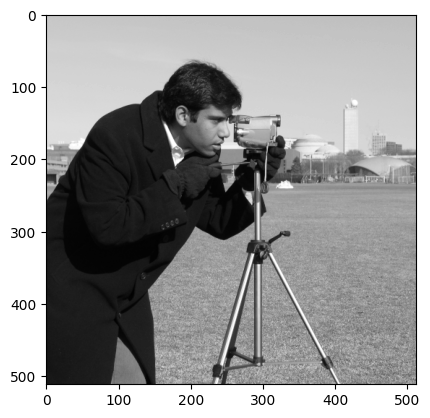

In [35]:
affiche_image()

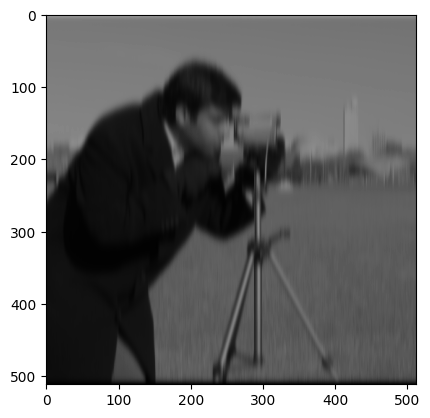

In [36]:
filtrage_image_vertical(data.camera())

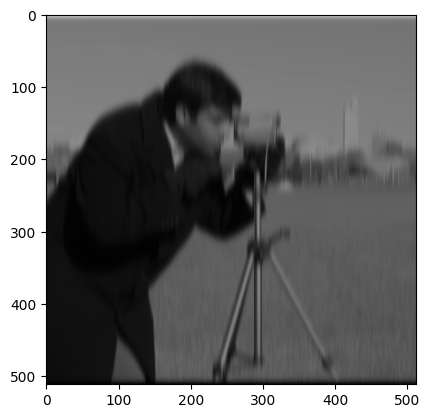

In [37]:
filtrage_image_horizontal(data.camera())

[[261.34468596 261.33278031 261.31705765 ... 247.0582992  248.28800906
  248.29986403]
 [226.15759674 226.11834464 226.08732947 ... 213.93689881 214.87207394
  214.90052553]
 [198.14352225 198.07649943 198.03119811 ... 187.59219193 188.27062846
  188.31512513]
 ...
 [  6.86304927   6.93132771   7.0967614  ...  41.12229008  40.45773034
   38.16876297]
 [  4.70873197   4.75850685   4.87292655 ...  28.17065072  27.69698802
   26.17500957]
 [  2.39607982   2.42227753   2.48080096 ...  14.32114581  14.07411136
   13.31556183]]


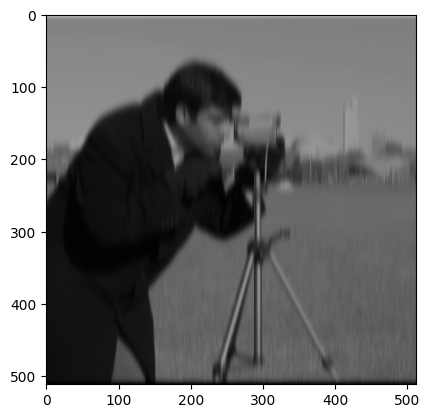

In [51]:
filtrge_image_both(data.camera())